In [2]:
# Loading RDKit descriptors
import pandas as pd
import os
import numpy as np
secfp = pd.read_csv("Secfp.csv")

df_standardize = pd.read_csv("data_standardize_0902.csv")
df_standardize.head(5)

,ID,Canonical_smiles,Title,Activity,Reference
0,Isonitrile_1,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009
1,WK14,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
2,WK14B,CC(=O)Oc1ccccc1/C=C/c1ccc2cccc(OC(C)=O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
3,WK15,Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Inactive,https://doi.org/10.1016/j.ijantimicag.2017.01.044
4,WK15B,CC(=O)Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Inactive,https://doi.org/10.1016/j.ijantimicag.2017.01.044


### **The First Approach**

/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_19751/2487196339.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_transform_active["PC1"].values, df_transform_active["PC2"].values, cmap='coolwarm', label='Active', c="green")
/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_19751/2487196339.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_transform_inactive["PC1"].values, df_transform_inactive["PC2"].values, cmap='coolwarm', label='Inactive', c="purple")


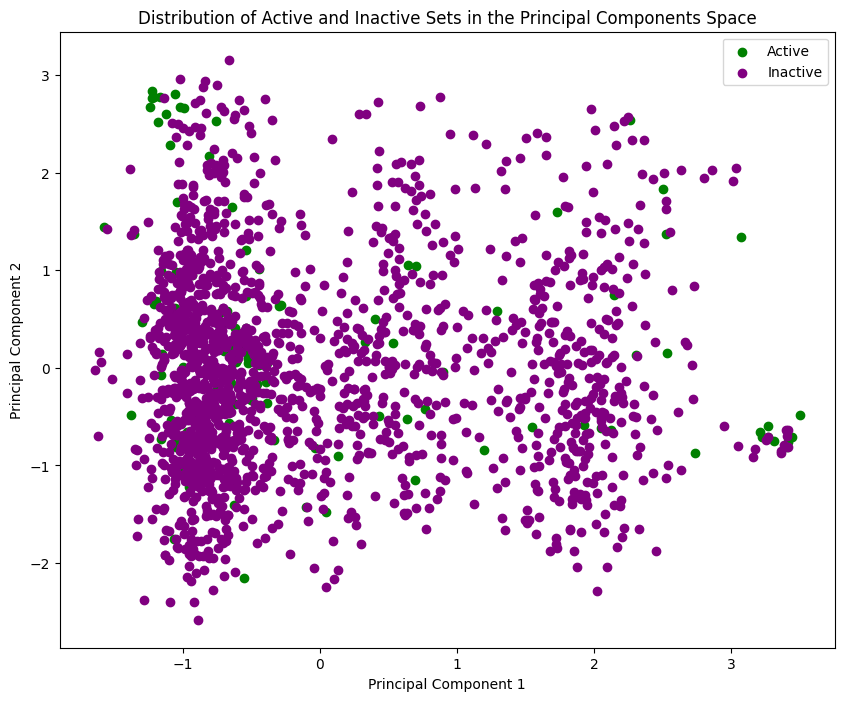

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Separate the active and inactive sets
active_set = secfp[secfp['Activity'] == 1]
inactive_set = secfp[secfp['Activity'] == 0]

# Perform PCA on the Secfp dataset
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(secfp.drop(['Activity'], axis=1))
df_transform = pd.concat([pd.DataFrame(transformed_data), secfp['Activity']], axis=1)
df_transform.columns = ['PC1', 'PC2', 'Activity']
df_transform_active = df_transform[df_transform['Activity'] == 1]
df_transform_inactive = df_transform[df_transform['Activity'] == 0]

# Plot the distribution of the active and inactive sets
plt.figure(figsize=(10,8))

plt.scatter(df_transform_active["PC1"].values, df_transform_active["PC2"].values, cmap='coolwarm', label='Active', c="green")
plt.scatter(df_transform_inactive["PC1"].values, df_transform_inactive["PC2"].values, cmap='coolwarm', label='Inactive', c="purple")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Distribution of Active and Inactive Sets in the Principal Components Space')
plt.legend()

#Saving
# folder = str('./Cluster_images')
# isExist = os.path.exists(folder)
# if not isExist:
#   os.makedirs(folder)
# save_dir = folder+'/'

# plt.savefig(save_dir+'PCA_secfp.png', dpi=600)
plt.show()


### **Tanimoto Similarity**

In [4]:
from tanimoto_matrix import similarity_matrix

data_fp = secfp.drop(['Activity'], axis=1)
ID = df_standardize['ID'].values

# Calculate the Tanimoto similarity matrix
tanimoto_similarity = similarity_matrix(data = data_fp, ID = ID)
tanimoto_similarity.fit()

Filling matrix: 100%|██████████| 1820/1820 [03:20<00:00,  9.08it/s]


In [6]:
#Tanimoto similarity matrix
tanimoto_simi_matrix = tanimoto_similarity.matrix
tanimoto_simi_matrix

,Isonitrile_1,WK14,WK14B,WK15,WK15B,Chalcone_6,Chalcone_18,Azole_12,Azole_18,1a,...,macro_diterpen13,5282071,78358496,5284373,24778015,72300,flavanones,N_ethylmaleimid,3117,9959038
Isonitrile_1,1.000000,0.000000,0.034884,0.000000,0.034091,0.058824,0.057692,0.025000,0.046512,0.000000,...,0.063063,0.057554,0.055556,0.051282,0.042553,0.032258,0.064516,0.039216,0.000000,0.088496
WK14,0.000000,1.000000,0.507463,0.631579,0.537313,0.071429,0.070175,0.146341,0.085106,0.063830,...,0.065574,0.012739,0.028369,0.022727,0.078431,0.117647,0.088235,0.015625,0.032258,0.030534
WK14B,0.034884,0.507463,1.000000,0.416667,0.555556,0.084034,0.100840,0.131868,0.088235,0.068627,...,0.094488,0.037037,0.054795,0.028571,0.101852,0.075949,0.071429,0.027778,0.028169,0.043478
WK15,0.000000,0.631579,0.416667,1.000000,0.677419,0.080357,0.098214,0.158537,0.061856,0.063158,...,0.065041,0.012658,0.028169,0.014925,0.067308,0.115942,0.066667,0.015385,0.031746,0.030303
WK15B,0.034091,0.537313,0.555556,0.677419,1.000000,0.091667,0.108333,0.179775,0.086538,0.067308,...,0.093023,0.030303,0.046980,0.028169,0.090090,0.115385,0.070175,0.027027,0.041667,0.050360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72300,0.032258,0.117647,0.075949,0.115942,0.115385,0.072165,0.070707,0.130435,0.088608,0.037037,...,0.075472,0.021429,0.007812,0.008475,0.068182,1.000000,0.144578,0.020833,0.021277,0.008475
flavanones,0.064516,0.088235,0.071429,0.066667,0.070175,0.077519,0.093023,0.130000,0.152381,0.034783,...,0.064286,0.065868,0.025000,0.047619,0.048780,0.144578,1.000000,0.050000,0.024691,0.040541
N_ethylmaleimid,0.039216,0.015625,0.027778,0.015385,0.027027,0.107143,0.043956,0.030769,0.041667,0.028169,...,0.051020,0.073171,0.035088,0.069307,0.064103,0.020833,0.050000,1.000000,0.193548,0.038462
3117,0.000000,0.032258,0.028169,0.031746,0.041667,0.069767,0.021739,0.015385,0.027778,0.014085,...,0.009901,0.023438,0.008621,0.028846,0.012346,0.021277,0.024691,0.193548,1.000000,0.019048


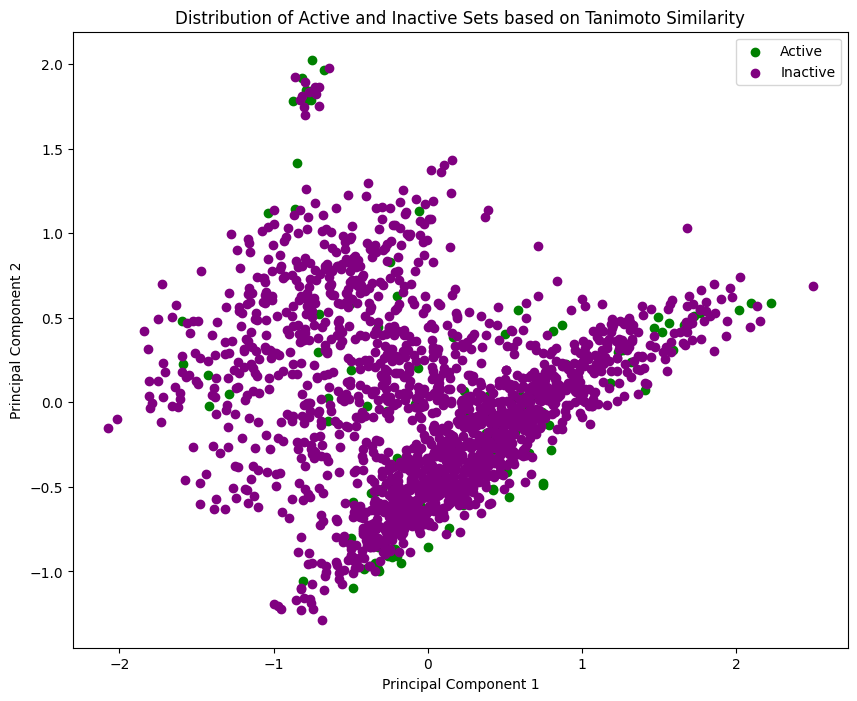

In [5]:
tanimoto_simi_matrix = tanimoto_similarity.matrix
tanimoto_simi_matrix.insert(0, 'Activity', secfp['Activity'].values)

# Separate the active and inactive sets
active_set_tani = tanimoto_simi_matrix[tanimoto_simi_matrix['Activity'] == 1]
inactive_set_tani = tanimoto_simi_matrix[tanimoto_simi_matrix['Activity'] == 0]

# Perform PCA on the Secfp dataset
pca = PCA(n_components=2)
transformed_data_tani = pca.fit_transform(tanimoto_simi_matrix.drop(['Activity'], axis=1))
df_transform_tani = pd.DataFrame(transformed_data_tani, columns=["PC1", "PC2"])
df_transform_tani.insert(0, 'Activity', tanimoto_simi_matrix['Activity'].values)
#df_transform_tani.columns = ['PC1', 'PC2', 'Activity']
df_transform_active_tani = df_transform_tani[df_transform_tani['Activity'] == 1]
df_transform_inactive_tani = df_transform_tani[df_transform_tani['Activity'] == 0]

# Plot the distribution of the active and inactive sets
plt.figure(figsize=(10,8))
plt.scatter(df_transform_active_tani["PC1"].values, df_transform_active_tani["PC2"].values, cmap='coolwarm', label='Active', c="green")
plt.scatter(df_transform_inactive_tani["PC1"].values, df_transform_inactive_tani["PC2"].values, cmap='coolwarm', label='Inactive', c="purple")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Distribution of Active and Inactive Sets based on Tanimoto Similarity')
plt.legend()
# #Saving
# folder = str('./Cluster_images')
# isExist = os.path.exists(folder)
# if not isExist:
#   os.makedirs(folder)
# save_dir = folder+'/'

# plt.savefig(save_dir+'Tanimoto_pca.png', dpi=600)

plt.show()


#### **3D dimension**

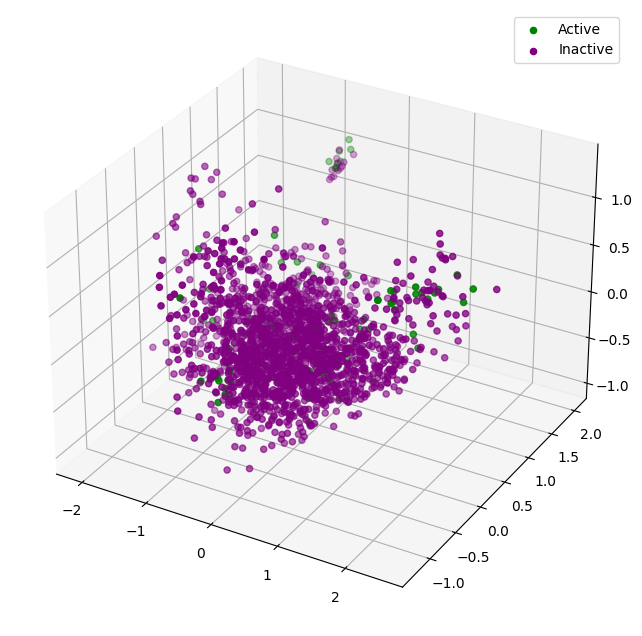

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure and axis for the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Perform PCA on the Secfp dataset
pca = PCA(n_components=3)
transformed_data_tani = pca.fit_transform(tanimoto_simi_matrix.drop(['Activity'], axis=1))
df_transform_tani = pd.DataFrame(transformed_data_tani, columns=["PC1", "PC2","PC3"])
df_transform_tani.insert(0, 'Activity', tanimoto_simi_matrix['Activity'].values)
#df_transform_tani.columns = ['PC1', 'PC2', 'Activity']
df_transform_active_tani = df_transform_tani[df_transform_tani['Activity'] == 1]
df_transform_inactive_tani = df_transform_tani[df_transform_tani['Activity'] == 0]

# Plot the data points in 3D
ax.scatter(df_transform_active_tani["PC1"].values, df_transform_active_tani["PC2"].values, df_transform_active_tani["PC3"].values, cmap='coolwarm', label='Active', c="green")
ax.scatter(df_transform_inactive_tani["PC1"].values, df_transform_inactive_tani["PC2"].values, df_transform_inactive_tani["PC3"].values, cmap='coolwarm', label='Inactive', c="purple")

# Show the legend
ax.legend()

# #Saving
# folder = str('./Cluster_images')
# isExist = os.path.exists(folder)
# if not isExist:
#   os.makedirs(folder)
# save_dir = folder+'/'

# plt.savefig(save_dir+'Tanimoto_pca_3d.png', dpi=600)

# Show the 3D scatter plot
plt.show()


### **Comparision multiple dimension reduction techniques**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


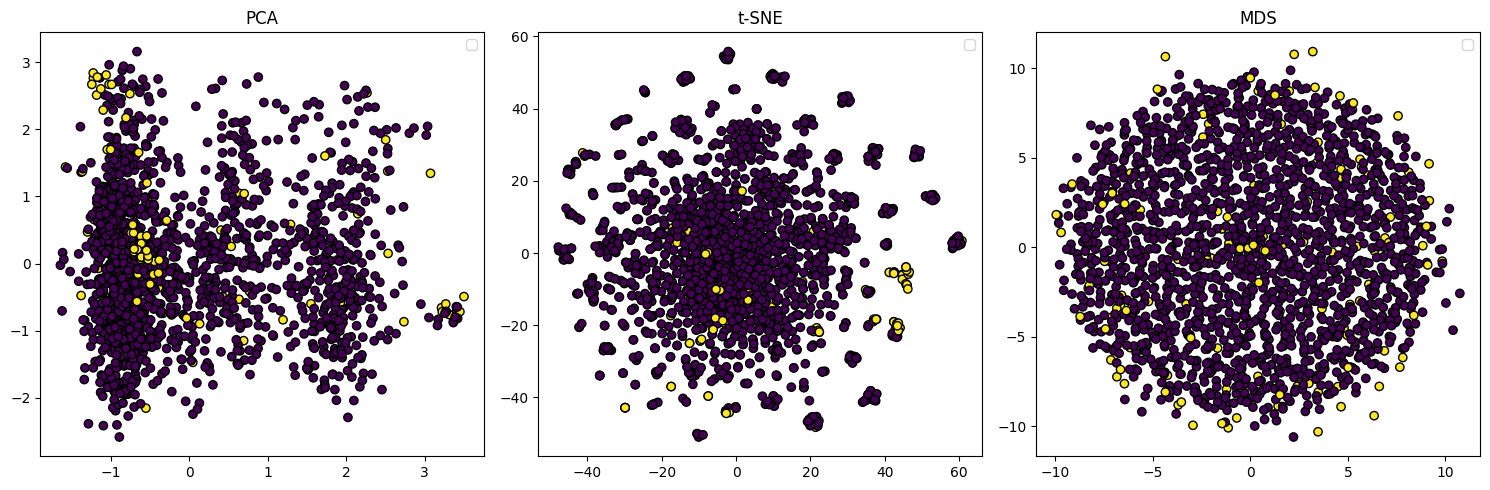

In [8]:
# dimension_reduction_comparison.py

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from prince import MCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
X = secfp.drop(['Activity'], axis=1)
y = secfp['Activity'].values

# Initialize dimension reduction methods
methods = [
    ("PCA", PCA(n_components=2)),
    ("t-SNE", TSNE(n_components=2, random_state=42)),
    ("MDS", MDS(n_components=2)),
] 

# Create a 3x3 plot
plt.figure(figsize=(15, 5))

for i, (name, method) in enumerate(methods, 1):
    plt.subplot(1, 3, i)

    if name == "LDA":
        # For supervised dimensionality reduction techniques, pass both X and y
        X_transformed = method.fit_transform(X, y)
    else:
        X_transformed = method.fit_transform(X)

    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.legend()
    plt.title(name)


plt.tight_layout()
plt.show()